# Combining Health and County Climate Data and Exploring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
climate_df = pd.read_csv('../data/cleaned/precip_AirTemp_monthly_1979_2011.zip', parse_dates=['month_year_long'], dtype={'county_FIPS': object})
heat_wave_days_df = pd.read_csv('../data/cleaned/heat_wave_days_1981_2010.csv', dtype={'County Code': object})
demo_df = pd.read_csv('../data/cleaned/final_demo.csv', dtype={'fips': object})

#health data
inf_df = pd.read_csv('../data/cleaned/inf_mortality.zip', parse_dates=['year_id'], dtype={'FIPS': object})
resp_df = pd.read_csv('../data/cleaned/resp_mortality.zip', parse_dates=['year_id'], dtype={'FIPS': object})
cvd_df = pd.read_csv('../data/cleaned/cvd_mortality.zip', parse_dates=['year_id'], dtype={'FIPS': object})

In [8]:
climate_df.drop(columns='Unnamed: 0', inplace=True)
#demo_df.drop(columns='Unnamed: 0', inplace=True)
inf_df.drop(columns='Unnamed: 0', inplace=True)
resp_df.drop(columns='Unnamed: 0', inplace=True)

In [10]:
climate_df.drop(columns='month_year_short', inplace=True)

In [17]:
climate_df.head()

,county_name,county_FIPS,month_year_long,avg_dailyMaxAirTemp_F,min_dailyMaxAirTemp_F,max_dailyMaxAirTemp_F,avg_daily_precip_mm,min_daily_precip_mm,max_daily_precip_mm
0,"Autauga County, AL",01001,1979-01-01,48.44,29.9,67.1,5.59,0.0,52.6
1,"Autauga County, AL",01001,1979-02-01,54.11,33.5,74.6,5.33,0.0,34.8
2,"Autauga County, AL",01001,1979-03-01,65.65,47.4,78.1,5.72,0.0,124.0
3,"Autauga County, AL",01001,1979-04-01,72.90,62.0,82.7,11.14,0.0,93.7
4,"Autauga County, AL",01001,1979-05-01,78.77,66.3,84.5,3.45,0.0,27.2


<AxesSubplot:xlabel='month_year_long'>

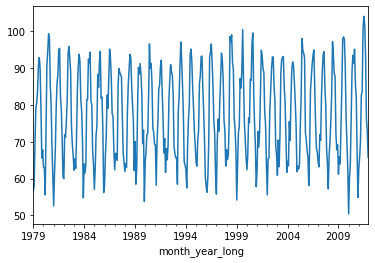

In [18]:
climate_df.groupby(['month_year_long'])['min_dailyMaxAirTemp_F'].max().plot()

In [20]:
inf_df['year'] = inf_df['year_id'].dt.year

In [ ]:
inf_df['mx'].plot()

In [17]:
inf_df_both = inf_df[inf_df['sex'] == 'Both']
resp_df_both = resp_df[resp_df['sex'] == 'Both']
cvd_df_both = cvd_df[cvd_df['sex'] == 'Both']

<AxesSubplot:ylabel='cause_name'>

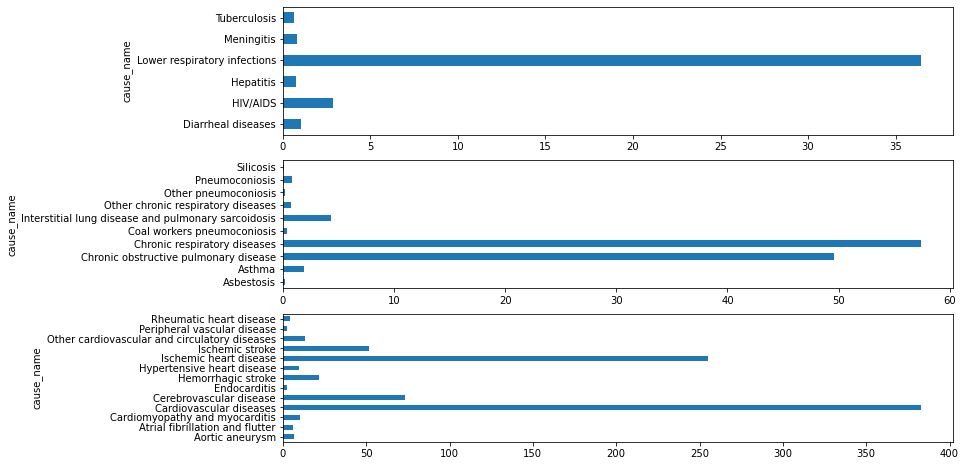

In [27]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8))
inf_df.groupby(['cause_name'])['mx'].mean().plot(kind='barh', ax=ax[0])
resp_df.groupby(['cause_name'])['mx'].mean().plot(kind='barh', ax=ax[1])
cvd_df.groupby(['cause_name'])['mx'].mean().plot(kind='barh', ax=ax[2])

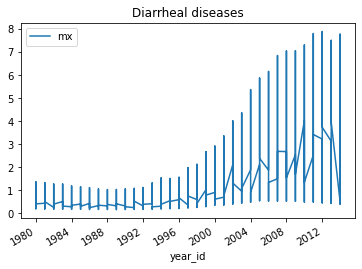

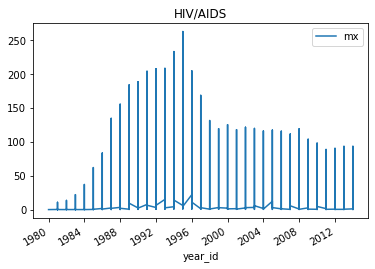

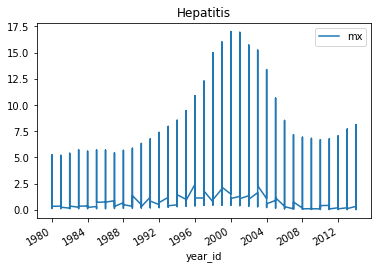

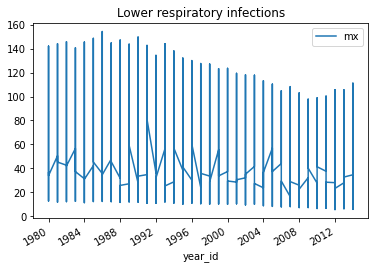

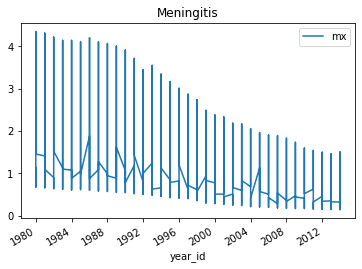

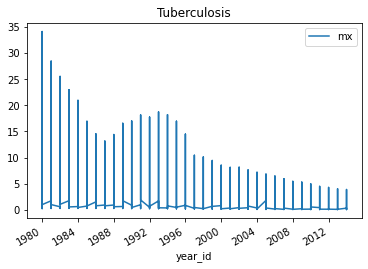

In [36]:
for title, group in inf_df.groupby('cause_name'):
    group.plot(x='year_id', y='mx', title=title)

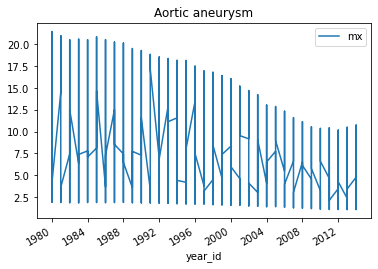

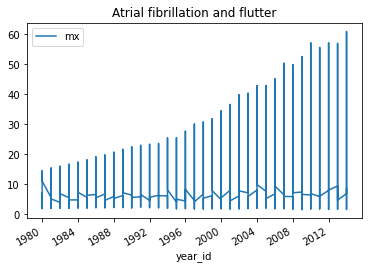

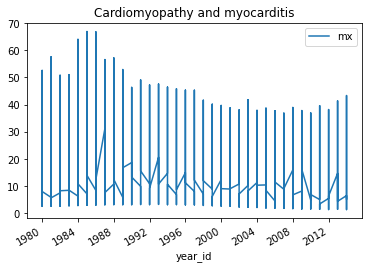

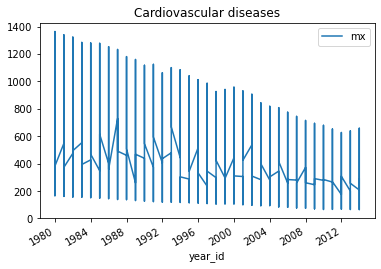

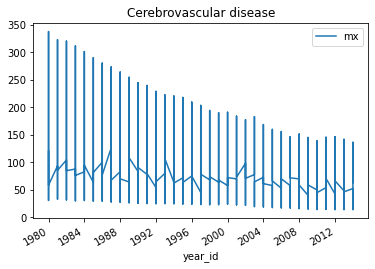

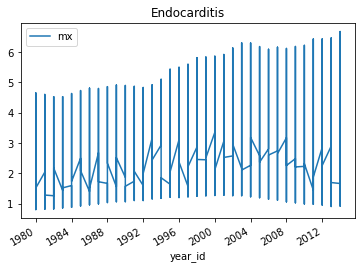

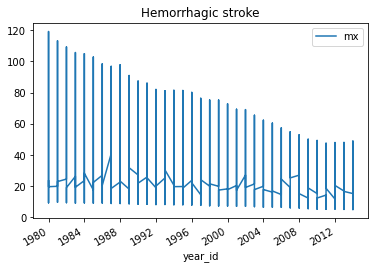

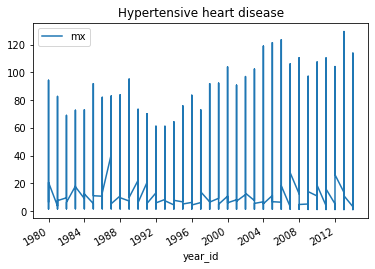

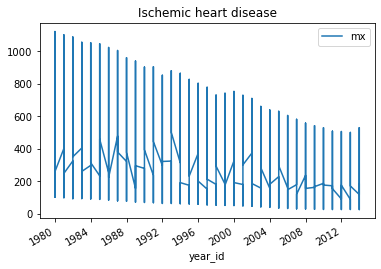

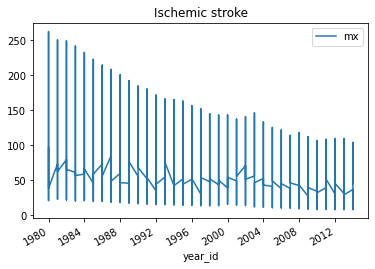

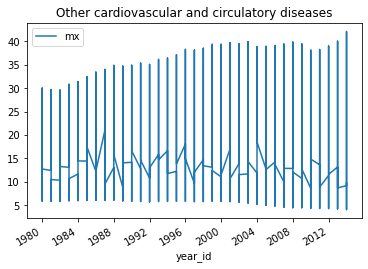

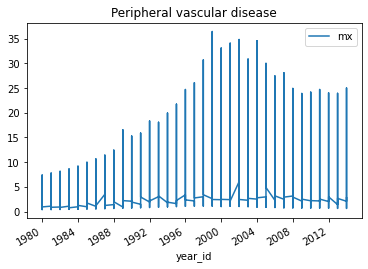

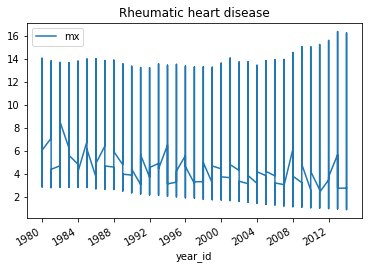

In [38]:
for title, group in cvd_df.groupby('cause_name'):
    group.plot(x='year_id', y='mx', title=title)

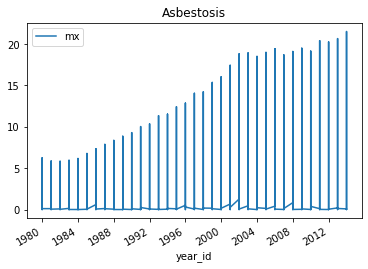

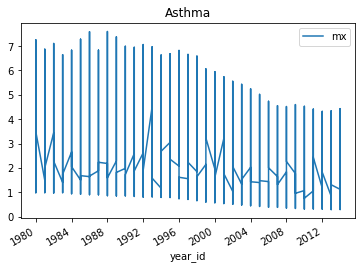

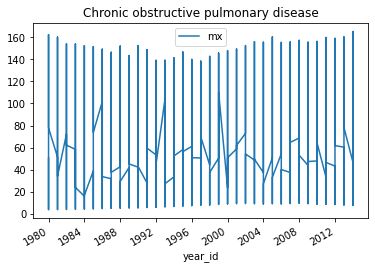

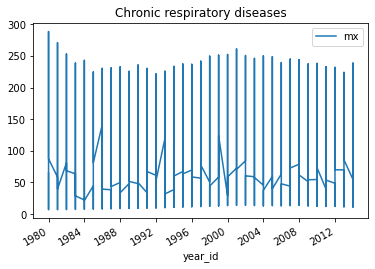

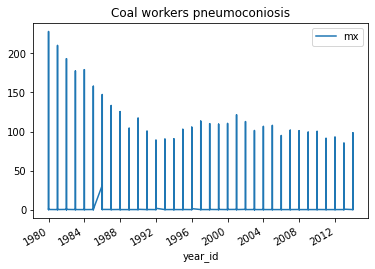

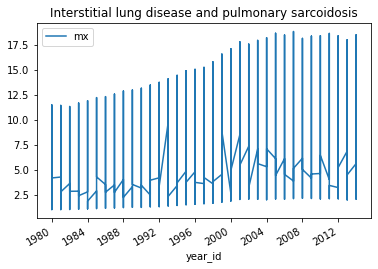

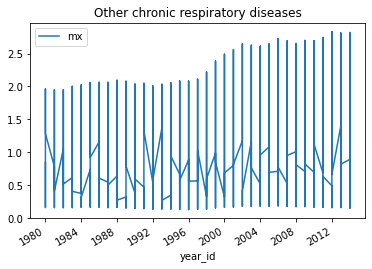

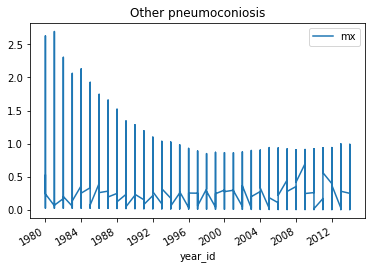

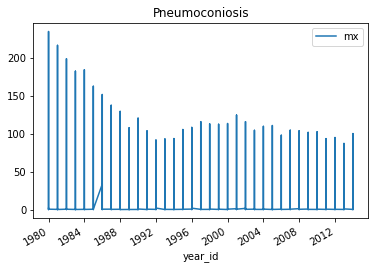

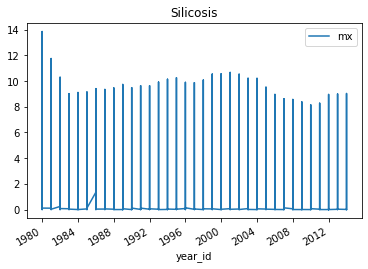

In [39]:
for title, group in resp_df.groupby('cause_name'):
    group.plot(x='year_id', y='mx', title=title)

In [40]:
inf_df_both = inf_df[inf_df['sex'] == 'Both']
inf_df_male = inf_df[inf_df['sex'] == 'Male']
inf_df_female = inf_df[inf_df['sex'] == 'Female']

<AxesSubplot:xlabel='year_id', ylabel='mx'>

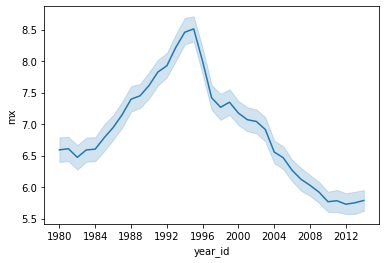

In [35]:
sns.lineplot(data=inf_df_both, x='year_id', y='mx')

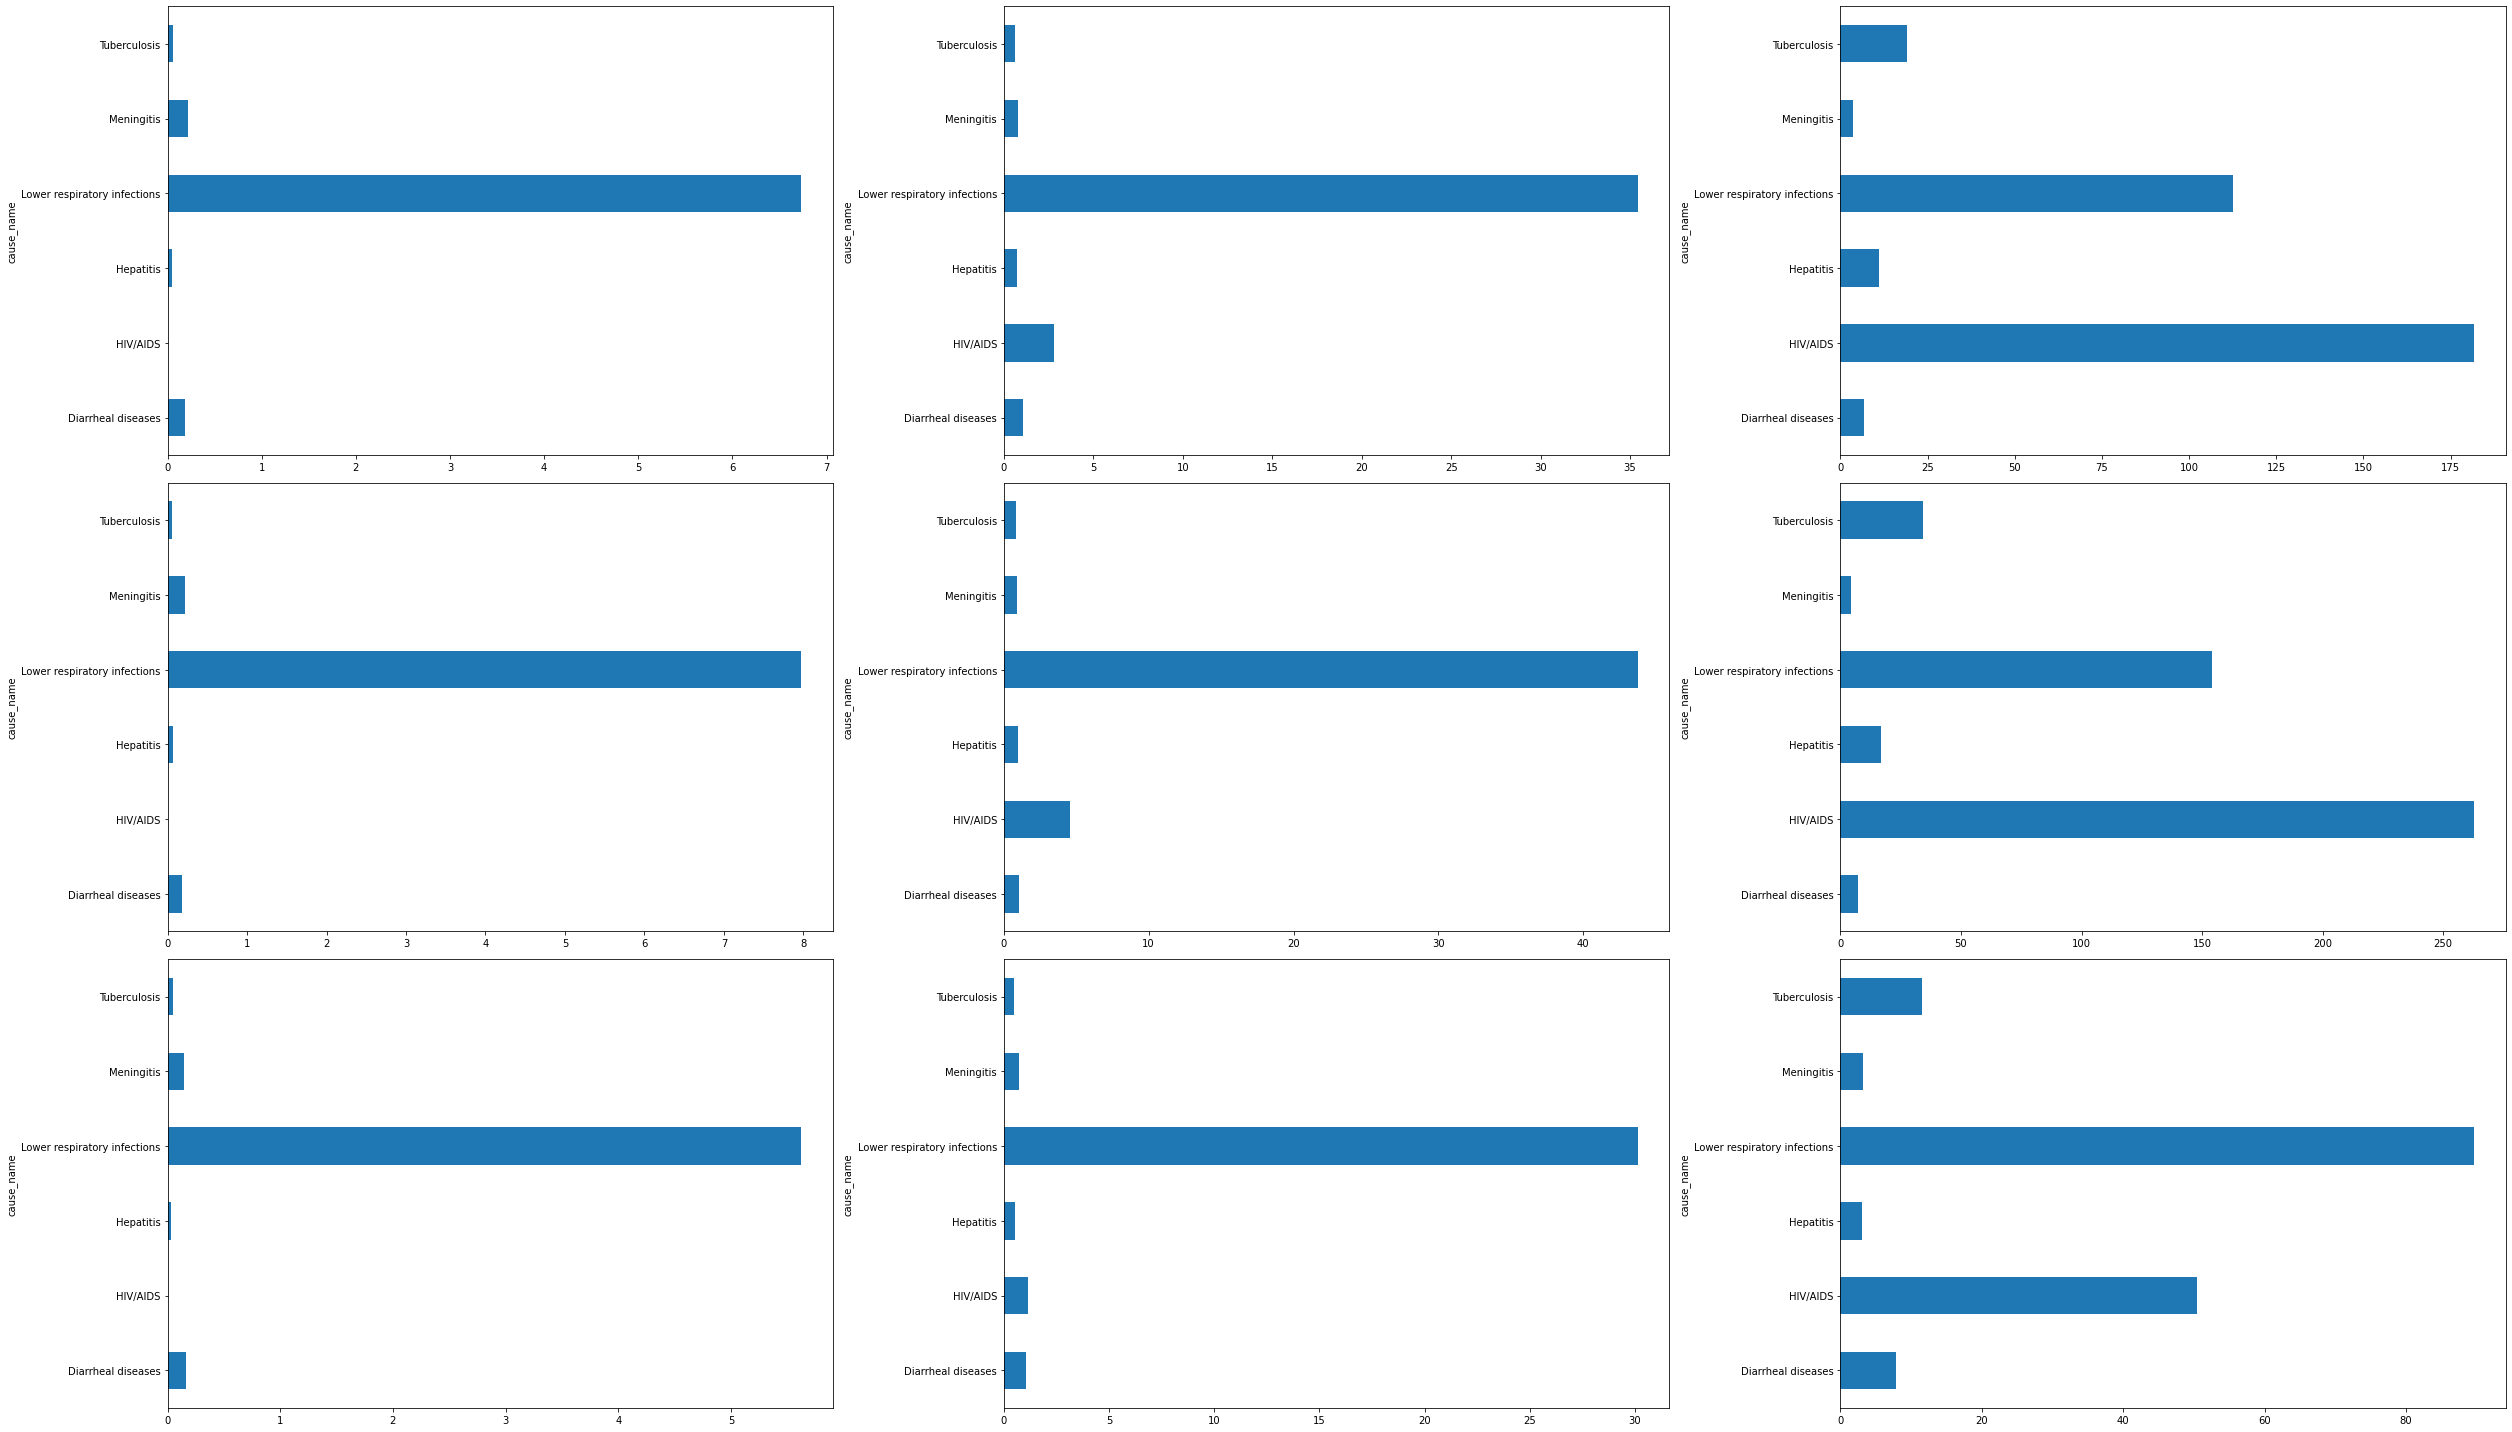

In [55]:
fig, ax = plt.subplots(3, 3, figsize=(35, 20))
inf_df_both.groupby('cause_name')['mx'].min().plot(kind='barh', ax=ax[0][0])
inf_df_both.groupby('cause_name')['mx'].mean().plot(kind='barh', ax=ax[0][1])
inf_df_both.groupby('cause_name')['mx'].max().plot(kind='barh', ax=ax[0][2])

inf_df_male.groupby('cause_name')['mx'].min().plot(kind='barh', ax=ax[1][0])
inf_df_male.groupby('cause_name')['mx'].mean().plot(kind='barh', ax=ax[1][1])
inf_df_male.groupby('cause_name')['mx'].max().plot(kind='barh', ax=ax[1][2])

inf_df_female.groupby('cause_name')['mx'].min().plot(kind='barh', ax=ax[2][0])
inf_df_female.groupby('cause_name')['mx'].mean().plot(kind='barh', ax=ax[2][1])
inf_df_female.groupby('cause_name')['mx'].max().plot(kind='barh', ax=ax[2][2])
plt.tight_layout();
# sns.barplot(data=inf_df_both, y='cause_name', x='mx', ax=ax[0])
# sns.barplot(data=inf_df_male, y='cause_name', x='mx', ax=ax[1])
# sns.barplot(data=inf_df_female, y='cause_name', x='mx', ax=ax[2]);

In [25]:
inf_demo_join_inf = 

,fips,total_pop_age_sex,median_age,sex_ratio_males,under_18_percent,over_18_percent,over_65_percent,county,state,total_hh,...,pop_2019,unemployment_rate_2019,uninsured_2019,veterans_2019,white_2019,white_not_hispanic_2019,Metro2013,rural_urban_continuum_code_2013,retirement_destination_2015_update,metro_adjacent_2013
0,01001,55380.0,38.2,94.7,23.8,76.2,15.0,Autauga County,Alabama,21397.0,...,55380.0,3.5,7.1,12.6,76.8,74.6,2.0,1.0,1.0,0.0
1,01003,212830.0,43.0,94.7,21.7,78.3,20.0,Baldwin County,Alabama,80930.0,...,212830.0,4.0,8.9,11.8,86.2,83.1,3.0,1.0,1.0,0.0
2,01005,25361.0,40.4,112.4,20.9,79.1,18.6,Barbour County,Alabama,9345.0,...,25361.0,9.4,11.3,6.6,46.8,45.8,6.0,0.0,0.0,1.0
3,01007,22493.0,40.9,117.5,20.6,79.4,15.9,Bibb County,Alabama,6891.0,...,22493.0,7.0,10.7,8.0,76.8,74.5,1.0,1.0,0.0,0.0
4,01009,57681.0,40.7,97.6,23.2,76.8,17.9,Blount County,Alabama,20847.0,...,57681.0,3.1,10.8,7.7,95.5,86.9,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,43521.0,35.3,106.8,26.5,73.5,11.4,Sweetwater County,Wyoming,15523.0,...,43521.0,5.7,11.3,8.6,93.4,79.6,5.0,0.0,0.0,0.0
3138,56039,23280.0,39.3,112.5,19.1,80.9,14.0,Teton County,Wyoming,9019.0,...,23280.0,0.7,12.7,5.3,89.3,81.3,7.0,0.0,0.0,0.0
3139,56041,20479.0,35.8,103.3,29.2,70.8,13.0,Uinta County,Wyoming,7597.0,...,20479.0,5.5,11.2,7.4,93.4,87.5,7.0,0.0,0.0,0.0
3140,56043,8027.0,42.9,102.6,24.6,75.4,21.1,Washakie County,Wyoming,3365.0,...,8027.0,4.1,15.0,11.9,89.7,81.9,7.0,0.0,0.0,0.0
